In [139]:
import numpy as np

class ObstacleAvoidance:
    def __init__(self, n, a, b, k, lambda_):
        if n == 0 or a == 0 or b == 0 or k == 0:
            raise ValueError("The obstacle detection constants must be declared")
        self.n = n
        self.a = a
        self.b = b
        self.k = k
        self.lambda_ = lambda_
        self.J = np.zeros((2, 1))  # Ensure J is properly sized

    def calculate_V(self, x_diff, y_diff):
        return np.exp(-np.power(x_diff, self.n) / self.a) * np.exp(-np.power(y_diff, self.n) / self.b)

    def j_ob(self, v, x_diff, y_diff):
        result = np.zeros(2)
        result[0] = -v * self.n * np.power(x_diff, self.n - 1) / self.a
        result[1] = -v * self.n * np.power(y_diff, self.n - 1) / self.b
        return result

    def obstacle_avoidance(self, robot_point, obstacle_point):
        x_diff = robot_point[0] - obstacle_point[0]
        y_diff = robot_point[1] - obstacle_point[1]

        if x_diff == 0 and y_diff == 0:
            return 0, 0, 0 # Not possible
        
        v = self.calculate_V(x_diff, y_diff)

        J_ob = self.j_ob(v, x_diff, y_diff)
        self.J = J_ob.reshape(2, 1)
        v_ref = self.k * (-v)

        lambda_Job = self.lambda_ * np.eye(2)

        J_ob_T_J_ob = np.outer(J_ob, J_ob) + lambda_Job
        pseudo_inv_term = J_ob @ np.linalg.pinv(J_ob_T_J_ob) * v_ref

        x_dot = pseudo_inv_term[0]
        y_dot = pseudo_inv_term[1]

        return x_dot, y_dot, v

    def get_J(self):
        return self.J

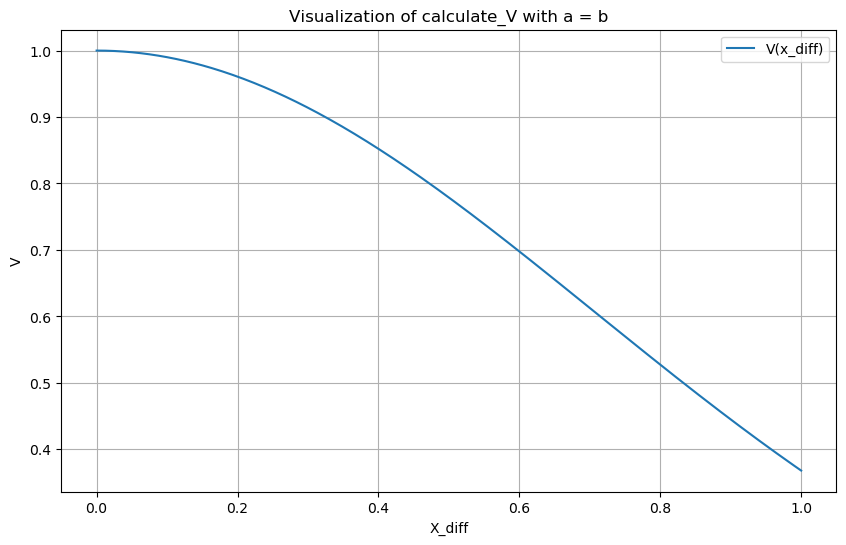

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ObstacleAvoidance:
    def __init__(self, n=None, a=None, b=None, k=None):
        self.J = None
        if n is None or a is None or b is None or k is None:
            raise TypeError("The obstacle detection constants must be declared ")

        ## constants
        self.n = n
        self.a = a
        self.b = b
        self.k = k

    def calculate_V(self, x_diff, y_diff):
        return np.exp(-np.power((x_diff)/self.a, self.n)) * np.exp(-np.power((y_diff)/self.b, self.n))

# Instantiate the class with example parameters
obstacle_avoidance = ObstacleAvoidance(n=2, a=1, b=1, k=1)

# Generate values for x_diff and y_diff
x_diff_values = np.linspace(0, 1, 400)
y_diff_value = 0  # Given that a and b are equal, setting y_diff to 0

# Calculate V values
V_values = [obstacle_avoidance.calculate_V(x, y_diff_value) for x in x_diff_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_diff_values, V_values, label='V(x_diff)')
plt.xlabel('X_diff')
plt.ylabel('V')
plt.title('Visualization of calculate_V with a = b')
plt.legend()
plt.grid(True)
plt.show()

Max x potential: 0.3204722929601864
Index: 436
Point -0.12625250501002017 has the maximum potential value of 0.3204722929601864
The values are: n=2, a=0.2, b=0.2, k=3.120394561299045, lambda=2


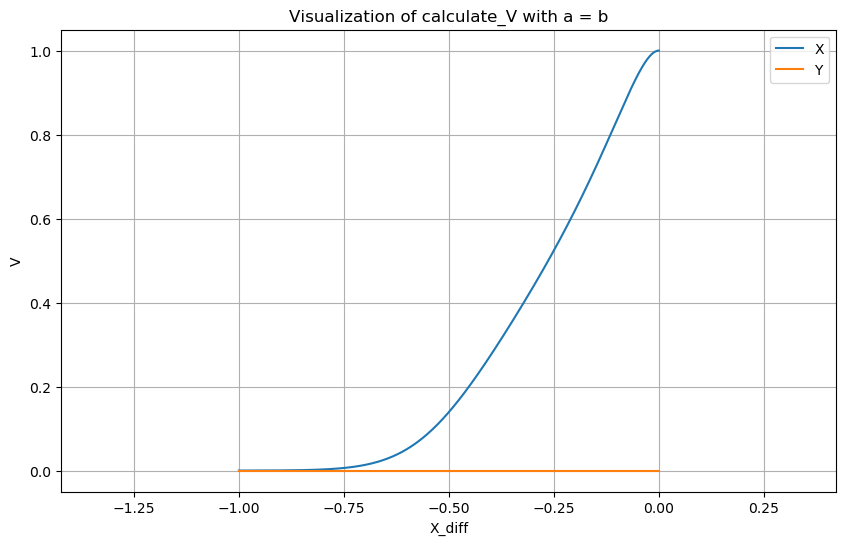

In [140]:
# private_nh.param("obstacle_avoidance_n", n, 2.0);
# private_nh.param("obstacle_avoidance_a", a, 0.05);
# private_nh.param("obstacle_avoidance_b", b, 0.05);
# private_nh.param("obstacle_avoidance_k", k, 10.103757784844165);
# private_nh.param("obstacle_avoidance_lambda", lambda, 10.0);
n_ = 2
a_ = 0.2
b_ = 0.2
lambda_ = 2
# Instantiate the ObstacleAvoidance class with example constants
obstacle_avoidance_system = ObstacleAvoidance(n=2, a=a_, b=b_, k=1, lambda_=lambda_)

# Robot point at (0, 0)
robot_point = (0, 0)

# Generate a grid of obstacle points
x_diff_values = np.linspace(-1, 0.0, 500)

# potential = [obstacle_avoidance_system.obstacle_avoidance(robot_point, (x, x)) if for x in x_diff_values]

potential = []
for x in x_diff_values:
    a, b, c = obstacle_avoidance_system.obstacle_avoidance(robot_point, (x, -0.0))

    # if a >= 1:
    #     a = 1
    # if b >= 1:
    #     b = 1
    
    potential.append([a, b, c])

potential = np.array(potential)
X_values = potential[:, 0]
max_x_potential = np.max(potential[:, 0])
print(f"Max x potential: {max_x_potential}")

# idx = X_values.index(max_x_potential)
index = np.where(X_values == max_x_potential)
print(f"Index: {index[0][0]}")

print(f"Point {x_diff_values[index[0][0]]} has the maximum potential value of {max_x_potential}")

k_ = 1/max_x_potential
obstacle_avoidance_system = ObstacleAvoidance(n=2, a=a_, b=b_, k=1/max_x_potential, lambda_=lambda_)

print(f"The values are: n={n_}, a={a_}, b={b_}, k={1/max_x_potential}, lambda={lambda_}")
potential = []
for x in x_diff_values:
    a, b, c = obstacle_avoidance_system.obstacle_avoidance(robot_point, (x+x_diff_values[index[0][0]], -0.0))

    # if a >= 1:
    #     a = 1
    # if b >= 1:
    #     b = 1
    
    potential.append([a, b, c])

potential = np.array(potential)

# Plot the results
plt.figure(figsize=(10, 6))
# Plotting the first line
plt.plot(x_diff_values, potential[:, 0], label='X')

# Plotting the second line
plt.plot(x_diff_values, potential[:, 1], label='Y')
plt.xlabel('X_diff')
plt.ylabel('V')
plt.ylim([0, 1.5])

plt.title('Visualization of calculate_V with a = b')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Max x potential: 1.0


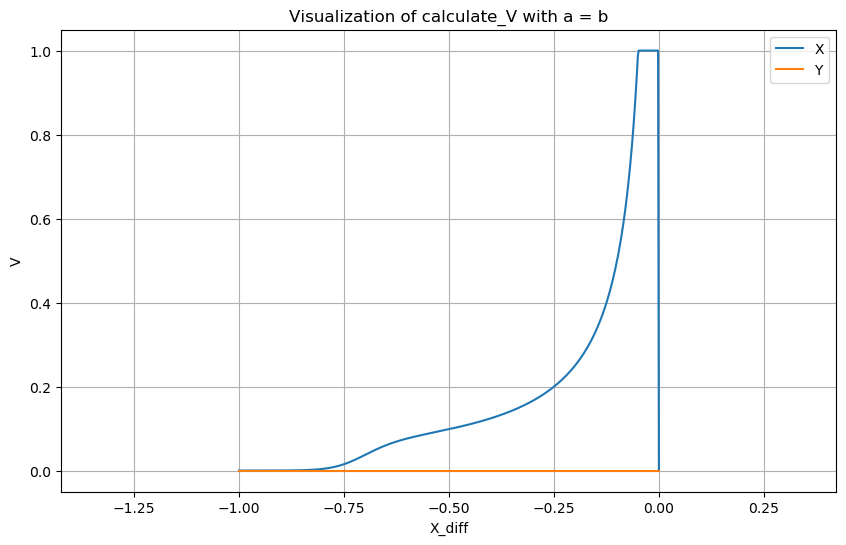

In [148]:
n_ = 2
a_ = 0.1
b_ = 0.1
lambda_ = 0.01
k_ = 1
# Instantiate the ObstacleAvoidance class with example constants
obstacle_avoidance_system = ObstacleAvoidance(n=2, a=a_, b=b_, k=k_, lambda_=lambda_)

# Robot point at (0, 0)
robot_point = (0, 0)

# Generate a grid of obstacle points
x_diff_values = np.linspace(-1, 0.0, 500)

# potential = [obstacle_avoidance_system.obstacle_avoidance(robot_point, (x, x)) for x in x_diff_values]
potential = []
for x in x_diff_values:
    a, b, c = obstacle_avoidance_system.obstacle_avoidance(robot_point, (x, -0.0))

    if a >= 1:
        a = 1
    if b >= 1:
        b = 1
    
    potential.append([a, b, c])

potential = np.array(potential)

max_x_potential = np.max(potential[:, 0])
print(f"Max x potential: {max_x_potential}")

# idx = X_values.index(max_x_potential)

# Plot the results
plt.figure(figsize=(10, 6))
# Plotting the first line
plt.plot(x_diff_values, potential[:, 0], label='X')

# Plotting the second line
plt.plot(x_diff_values, potential[:, 1], label='Y')
plt.xlabel('X_diff')
plt.ylabel('V')
plt.ylim([0, 1.5])

plt.title('Visualization of calculate_V with a = b')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

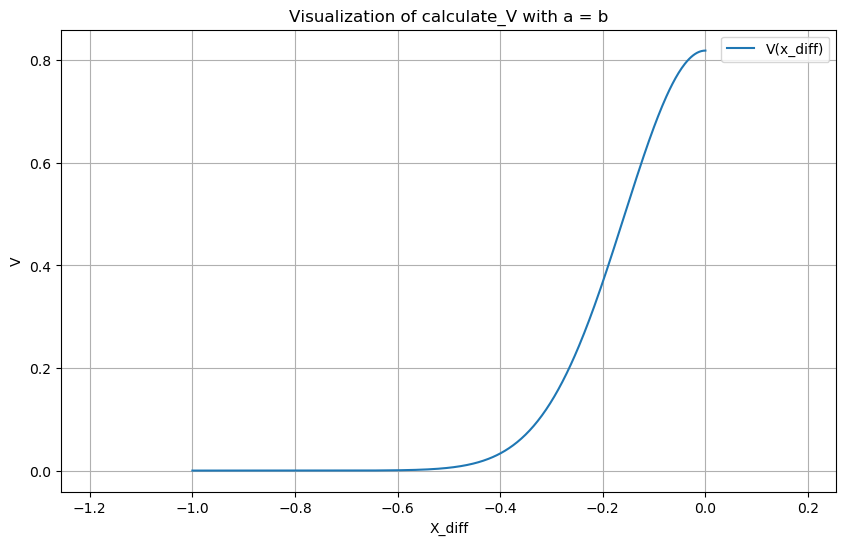

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_diff_values, potential[:, 2], label='V(x_diff)')
plt.xlabel('X_diff')
plt.ylabel('V')
plt.ylim([0, 1.5])

plt.title('Visualization of calculate_V with a = b')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [6]:
width = 0.3
margin = 0.2
abs_dist = 0.38

tanh_gain = 1

# Variables
y = 0.98 # 98% of the tanh

if (abs_dist < width):
    print("Full power!")
elif (abs_dist < width + margin):
    d = width + margin - abs_dist
    x = d*(1/tanh_gain)*np.arctanh(y)/margin
    print(f"X: {x}")
    value_gain = np.tanh(tanh_gain*x)
    print(f"working with {value_gain}% of the power!")
else:
    print("Point too far")

X: 1.3785359550403766
working with 0.8806230088409889% of the power!
